In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D
from keras.datasets import cifar10,mnist

from keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
# 学習データの準備
(x_train,_),(x_test,_) = mnist.load_data()
# 正規化(0-1)
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [5]:
# 学習データの準備
(x_train,_),(x_test,_) = cifar10.load_data()
# 正規化(0-1)
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))  # adapt this if using `channels_first` image data format

In [18]:
# モデル
c_autoencoder = Sequential()
#Encoder
c_autoencoder.add(Conv2D(16,(3,3),
                         activation='relu',
                         padding='same',
                         input_shape=x_train.shape[1:]
                         ))
c_autoencoder.add(MaxPooling2D(pool_size=(2,2)))
c_autoencoder.add(Conv2D(8,(3,3),
                         activation='relu',
                         padding='same'
                         ))
c_autoencoder.add(MaxPooling2D(pool_size=(2,2)))

#Decoder
c_autoencoder.add(Conv2D(8,(3,3),
                         activation='relu',
                         padding='same',
                         ))
c_autoencoder.add(UpSampling2D(size=(2,2)))
c_autoencoder.add(Conv2D(16,(3,3),
                         activation='relu',
                         padding='same',
                         ))
c_autoencoder.add(UpSampling2D(size=(2,2)))
c_autoencoder.add(Conv2D(3,(3,3),
                         activation='relu',
                         padding='same',
                         ))

c_autoencoder.summary()
c_autoencoder.compile(optimizer='adam',
                      loss = 'binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 16)        1168      
__________

In [7]:
c_autoencoder.fit(x_train, x_train,
                  epochs=1,
                  batch_size=128,
                  shuffle=True,
                  validation_data=(x_test, x_test)
                 )

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 135s - loss: 0.6916 - val_loss: 0.6016


In [9]:
# モデルの保存
c_autoencoder.save("c_autoencoder.hdf5")

In [11]:
model=load_model("c_ae.hdf5")

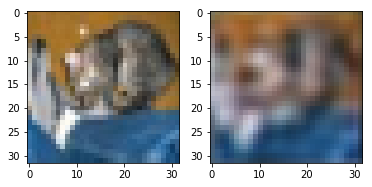

In [20]:
model=load_model("c_ae.hdf5")
plt.subplot(1,2,1)
plt.imshow(x_test[0])
plt.gray()
plt.subplot(1,2,2)
decoded_image = model.predict(x_test)
plt.imshow(decoded_image[0])
plt.gray()
#plt.savefig("result.png")